# Anscombe's Quartet
_Renaissance EXL_  
_Renaissance Learning, 2023_  

## Overview

When first learning about statistics, it can be enticing to think that **quantitative descriptive statistics** like *mean*, *standard deviation*, and the *correlation coefficient* tell us all we need to know about the data. Graphing data, on the other hand, may be seen as subjective when compared with statistics. A graph might suggest a general shape, but a standard deviation is precise.  

As we'll see, good data analysis requires *both* statistical analysis *and* data visualization. Neither method is complete on its own, and we need information from both methods in order to make sound data-driven decisions.  

In 1973, the English statistician **Frank Anscombe**, who was a strong advocate for this balanced approach, published four sets of data to make the point very clear. We'll load these datasets, known as *Anscombe's Quartet*, and let the data do the talking.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## View Data

In [2]:
# load the data from a CSV file
anscombe = pd.read_csv('../data/anscombes_quartet.csv')

display(anscombe.head(10))
print(len(anscombe), 'rows')
print(anscombe['quartet'].unique())

,quartet,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.82


44 rows
['I' 'II' 'III' 'IV']


Taking a look, we see that the DataFrame has three columns. All four quartets are included in the frame, and the set to which the data belongs is labeled by the `quartet` column. The values in this column are of type `string`, capitalized Roman numerals representing each dataset.  
  
If we're the kind of person who thinks we're really clever, we should be able to just display the data and understand it well enough. Let's give it a go...

In [3]:
quartets = ['I', 'II', 'III', 'IV']

for q in quartets:
    print("\nAscombe's Quartet {}".format(q))
    qdata = anscombe[anscombe.quartet == q].reset_index(drop=True)
    display(qdata)


Ascombe's Quartet I


,quartet,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.82



Ascombe's Quartet II


,quartet,x,y
0,II,10,9.14
1,II,8,8.14
2,II,13,8.74
3,II,9,8.77
4,II,11,9.26
5,II,14,8.10
6,II,6,6.13
7,II,4,3.10
8,II,12,9.13
9,II,7,7.26



Ascombe's Quartet III


,quartet,x,y
0,III,10,7.46
1,III,8,6.77
2,III,13,12.74
3,III,9,7.11
4,III,11,7.81
5,III,14,8.84
6,III,6,6.08
7,III,4,5.39
8,III,12,8.15
9,III,7,6.42



Ascombe's Quartet IV


,quartet,x,y
0,IV,8,6.58
1,IV,8,5.76
2,IV,8,7.71
3,IV,8,8.84
4,IV,8,8.47
5,IV,8,7.04
6,IV,8,5.25
7,IV,19,12.50
8,IV,8,5.56
9,IV,8,7.91


Personally, figuring out what each dataset looks like, and describing its variance, correlation and average in my head is too much work for me. Let's code instead.

## Summary Statistics

Let's print out some pretty common descriptive statistics:
- Mean ($μ$)
- Median ($Mdn$)
- Standard Deviation ($σ$)
- Pearson Correlation Coefficient ($r$)
- Linear regression line ($y = mx + b$)
    
Note: We can change the rounding precision by updating the `precision` variable below.

In [4]:
precision = 2

datasets = {}
for q in quartets:
    qdata = anscombe[anscombe.quartet == q]
    x = qdata['x'].to_list()
    y = qdata['y'].to_list()
    m, b = np.polyfit(x, y, deg=1)  # slope, intercept
    m = round(m, precision)
    b = round(b, precision)
    
    # Add to dictionary for easier plotting later
    datasets[q] = {'x': x, 'y': y}
    
    # Print summary statistics
    print(q)
    print('            Mdn of x:  ', round(np.median(x), precision))
    print('              μ of x:  ', round(np.mean(x), precision))
    print('              σ of x:  ', round(np.std(x), precision))
    print('              μ of y:  ', round(np.mean(y), precision))
    print('              σ of y:  ', round(np.std(y), precision))
    print('              r(x~y):  ', round(np.corrcoef(x, y)[0][1], precision))
    print('    Linear reg. line:  ', f'y = {round(m, precision)} x + {round(b, precision)}', '\n')

I
            Mdn of x:   9.0
              μ of x:   9.0
              σ of x:   3.16
              μ of y:   7.5
              σ of y:   1.94
              r(x~y):   0.82
    Linear reg. line:   y = 0.5 x + 3.0 

II
            Mdn of x:   9.0
              μ of x:   9.0
              σ of x:   3.16
              μ of y:   7.5
              σ of y:   1.94
              r(x~y):   0.82
    Linear reg. line:   y = 0.5 x + 3.0 

III
            Mdn of x:   9.0
              μ of x:   9.0
              σ of x:   3.16
              μ of y:   7.5
              σ of y:   1.94
              r(x~y):   0.82
    Linear reg. line:   y = 0.5 x + 3.0 

IV
            Mdn of x:   8.0
              μ of x:   9.0
              σ of x:   3.16
              μ of y:   7.5
              σ of y:   1.94
              r(x~y):   0.82
    Linear reg. line:   y = 0.5 x + 3.0 



Perhaps surprisingly, these four data sets have remarkably similar statistics! Aside from their median $x$ values differing slightly, all other statistics are identical to the nearest hundredth. So the data must be pretty similar, right? Let's visualize it, just to check...

## Plot Data

The code cell below will create and display scatter plots for each of the four quartets. It makes use of the plotting library `matplotlib`, which we imported earlier. Don't worry if you don't understand the plotting code yet – we'll take a closer look at plotting in the next tutorial.

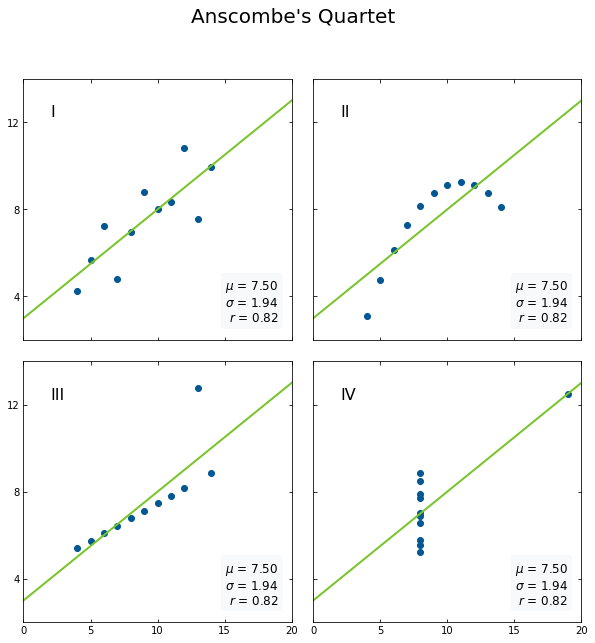

In [5]:
# Adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

fig, axs = plt.subplots(2, 2, figsize=(10, 10),
                        sharex=True,
                        sharey=True, 
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=range(0, 21, 5), yticks=range(4, 13, 4))

blue = '#005793'
green = '#78C42A'
grey = '#F3F5F7'

i = 0
for label, values in datasets.items():
    x = values['x']
    y = values['y']
    ax = axs.flat[i]
    
    ax.text(0.1, 0.9, label, fontsize=16, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o', color=blue)

    # draw linear regression line
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color=green, lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc=grey, ec=grey, alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=12, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')
    i += 1
plt.suptitle("Anscombe's Quartet", fontsize=20)
plt.show()

Ok, obviously these data sets are not at all similar. Now that we've visualized the data, we might make the following assertions:

- **Quartet I:** Well correlated, linear, increasing

- **Quartet II:** Quadratic function, concave down, $y$ is decreasing as $x$ increases

- **Quartet III:** Highly correlated, linear increasing with one obvious outlier point that decreases the correlation

- **Quartet IV:** Zero correlation, with points dispersed along a single $x$ value, with one outlier point that is responsible for the positive correlation.  

## Conclusions

Despite being more qualitative, these visual representations of the data are extremely important for how we think about the data. This new knowledge doesn't necessarily nullify the summary statistics calculated earlier, *but it might*. The difference between Quartets I and II highlights that we should be careful about projections we might make. Just because the correlation is positive and the linear regression provides a positive slope does not mean that we should predict that the values will increase.  

Similarly, when looking at Quartets III and IV, we should notice the important contributions of just one outlier in our statistics. Outliers can be the difference between a perfect correlation ($r = 1$) and no relationship ($r = 0$). Any decisions we make or actions we take based on the data should consider these outliers, and whether or not they are an important part of the data's story.